In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PharamAI.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Data Load,Claim Id,Claim Date,HCP ID,Specialty_Group,State,Payment Type,Target HCP,Product,Out of Pocket in $,Out of Pocket Type,Days Of Supply,Therapy,12 Month LB Period
0,14-Apr,52,1/1/2021,1516.0,NEUROLOGY,CA,State Medicaid,N,eptinezumab,125.0,Coinsurance,56.0,Migraine,N
1,14-Apr,60,1/1/2021,1301.0,NEUROLOGY,CA,Medicare MAPDP,Y,Ajovy,41.0,Coinsurance,56.0,Migraine,Y
2,14-Apr,107,1/1/2021,1798.0,PSYCHIATRY,DC,Medicare MAPDP,N,Emgality,129.0,Deductible,84.0,Migraine,Y
3,14-Apr,174,1/1/2021,1898.0,PSYCHIATRY,DE,Medicare MAPDP,Y,Aimovig,97.0,Deductible,84.0,Migraine,N
4,14-Apr,265,1/1/2021,1692.0,PSYCHIATRY,OH,Commercial,N,eptinezumab,25.0,Deductible,84.0,Migraine,Y


In [5]:
df.shape

(100000, 14)

## <span style=color:red>Description of Data</span>
* Data Load : date of data loaded
* Claim ID : its unique that's why its primary key
* Claim Date : Claiming Date between January and February
* HCP ID: Healthcare Professional ID
* Target HCP 
* Out of Pocket in $
* Therapy
* Days of Supply
* 12 Month LB Period 

#### Specialty Group:
* PSYCHIATRY : Diagnosis, treatment of mental disorders
* NEUROLOGY :  dealing with disorders of the nervous system
* IM/FM : Internal Medicine and Family Medicine
* NP/PA : 

#### State : all the countries form the United State

#### Payment type: 
* State Medicaid
* Commercial
* Medicare MAPDP
* Medicare PDP
* Managed Medicaid
* Other

#### Product :
* eptinezumab
* Ajovy
* Emagality
* Aimovig

#### Out of Pocket Type :
* Coinsurance
* Deductible : Firstly Paid by user then after Insurance company will give to user
* Copay : 10% amount to pay by user to Hospital/__

### Feature Engineering and Exploratory Data Analysis

In [6]:
df.isnull().sum()

Data Load             0
Claim Id              0
Claim Date            0
HCP ID                1
Specialty_Group       1
State                 1
Payment Type          1
Target HCP            1
Product               2
Out of Pocket in $    4
Out of Pocket Type    4
Days Of Supply        7
Therapy               1
12 Month LB Period    0
dtype: int64

#### Their are countable NULL values so we can fill it by central tendency

In [7]:
null_feature = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

null_feature

['HCP ID',
 'Specialty_Group',
 'State',
 'Payment Type',
 'Target HCP',
 'Product',
 'Out of Pocket in $',
 'Out of Pocket Type',
 'Days Of Supply',
 'Therapy']

#### Deal with NULL values

In [8]:
for feature in null_feature:
    df[feature]=df[feature].fillna(df[feature].mode()[0])    

#### Separating the Categorical and Numerical Columns

In [9]:
cols = df.columns
num_cols= df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [10]:
num_cols

Index(['Claim Id', 'HCP ID', 'Out of Pocket in $', 'Days Of Supply'], dtype='object')

#### Checking Outlier from the Data

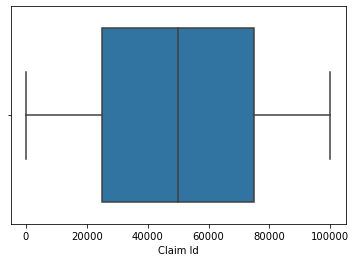

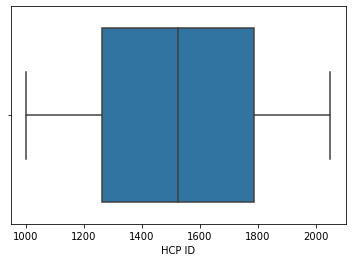

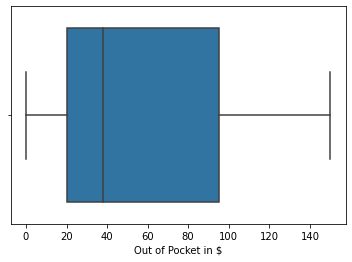

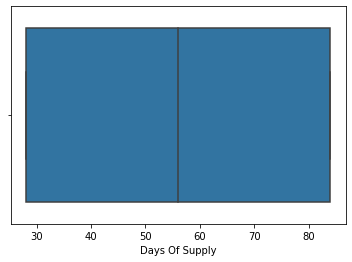

In [11]:
for feature in num_cols:
    sns.boxplot(feature, data=df)
    plt.show()

#### Conclusion: Their is no Outlier in Numerical data

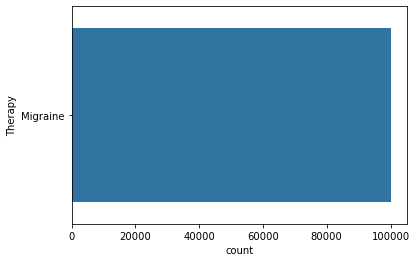

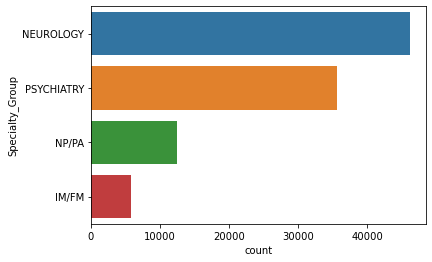

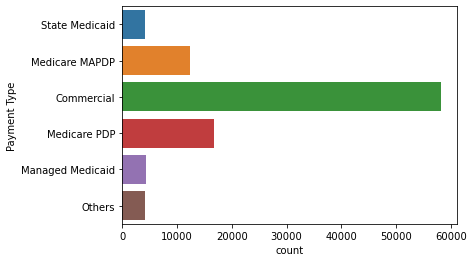

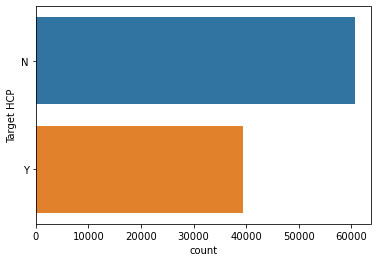

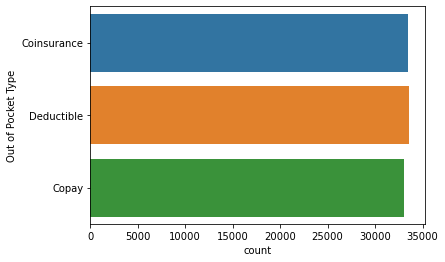

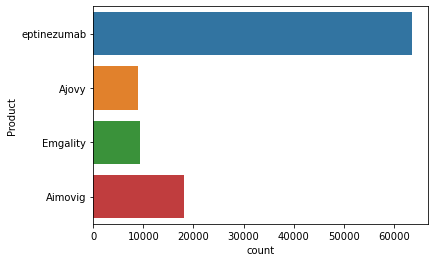

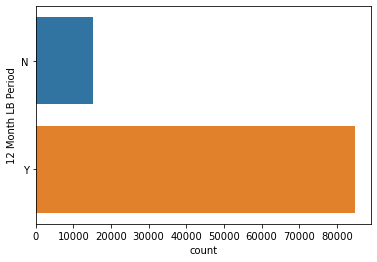

In [12]:
for feature in cat_cols:
    if feature == "Claim Date" or feature == "State" or feature == "Data Load":
        pass
    else:
        sns.countplot(y=df[feature], orient="h")
        plt.show()

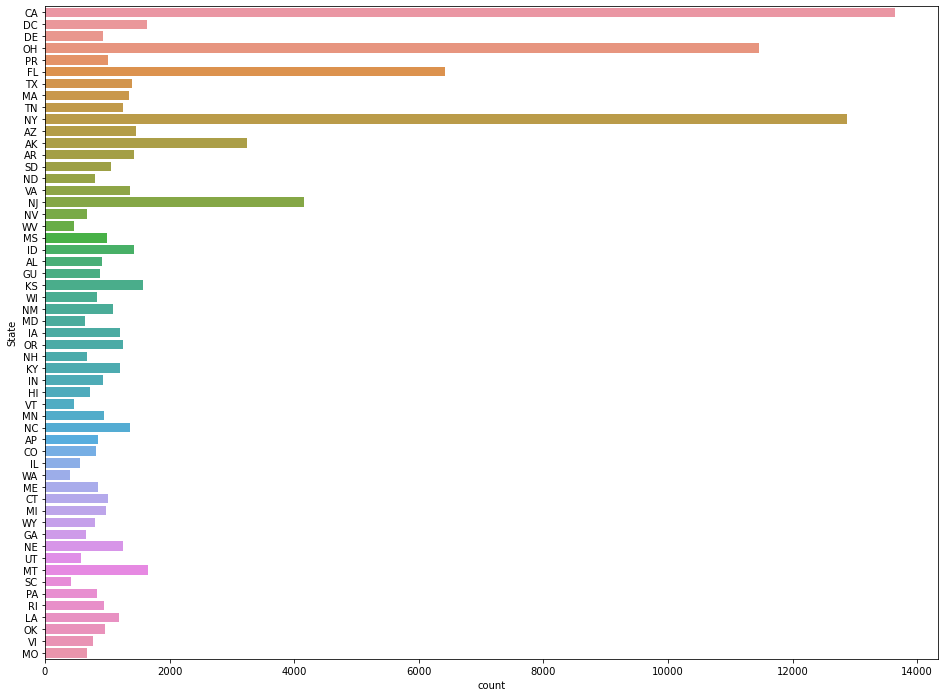

In [13]:
plt.figure(figsize=(16,12))
sns.countplot(y=df["State"])
plt.show()

### Which product is the leading the market?

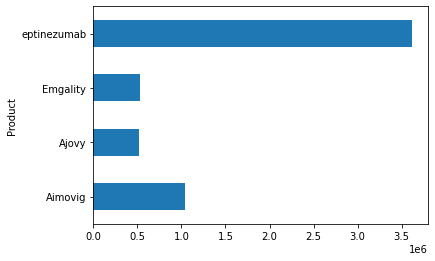

In [14]:
df.groupby("Product")["Out of Pocket in $"].sum().plot(kind="barh")

### What is the average out of Pocket?

In [15]:
df["Out of Pocket in $"].mean()

57.05064

### Does demographic have any influence on the scale?

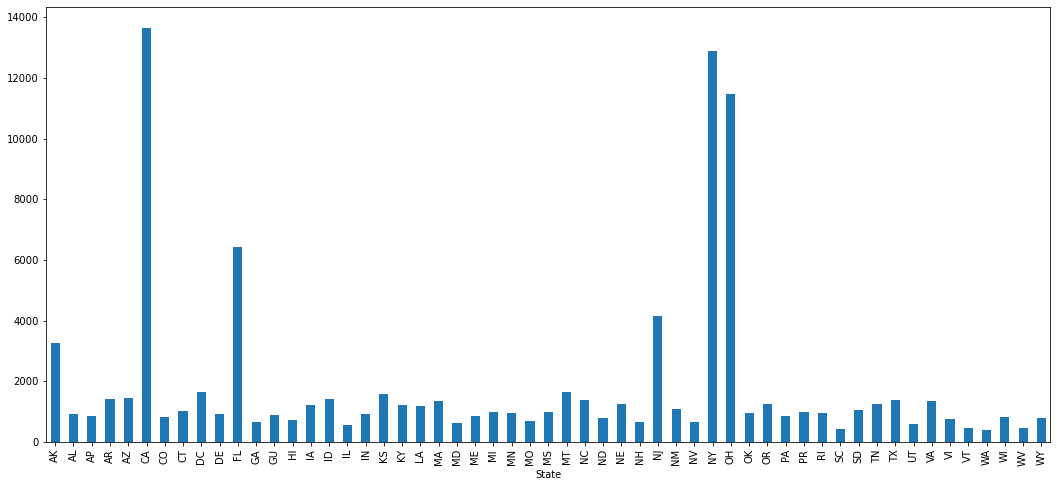

In [28]:
plt.figure(figsize=(18,8))
df.groupby(["State"])["Out of Pocket in $"].count().plot(kind="bar")

### Who are my top 50 potential-targets?

In [33]:
new_df = df[df["Target HCP"]=="Y"]
potential_target = new_df.groupby("HCP ID")["Claim Id"].count()

In [35]:
potential_target.nlargest(50)

HCP ID
1297.0    123
1573.0    123
1792.0    116
1852.0    116
1909.0    116
1077.0    115
1125.0    115
1342.0    115
1860.0    115
1032.0    114
1233.0    114
1622.0    114
1782.0    114
1871.0    114
1981.0    114
2019.0    114
2020.0    114
1228.0    113
1267.0    113
1388.0    113
1512.0    113
1712.0    113
1787.0    113
1862.0    113
1984.0    113
1296.0    112
1640.0    112
1273.0    111
1442.0    111
1585.0    111
1732.0    111
1828.0    111
1223.0    110
1436.0    110
1701.0    110
1827.0    110
1844.0    110
1865.0    110
1912.0    110
1152.0    109
1201.0    109
1361.0    109
1038.0    108
1093.0    108
1190.0    108
1314.0    108
1797.0    108
1845.0    108
2004.0    108
1027.0    107
Name: Claim Id, dtype: int64

#### This are the top 50 Healthcare Professional ID